In [1]:
import numpy as np
import pandas as pd

import dask.dataframe as dd
import dask.array as da
import dask.bag as db

E:\sourcecode\keep_learning\.venv\Lib\site-packages\dask\dataframe\__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


create a dask object

In [2]:
index = pd.date_range("2021-09-01", periods=2400, freq="1h")
df = pd.DataFrame({"a": np.arange(2400), "b": list("abcaddbe" * 300)}, index=index)
ddf = dd.from_pandas(df, npartitions=10)
ddf

,a,b
npartitions=10,,
2021-09-01 00:00:00,int32,string
2021-09-11 00:00:00,...,...
...,...,...
2021-11-30 00:00:00,...,...
2021-12-09 23:00:00,...,...


In [3]:
ddf.divisions

(Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-09-11 00:00:00'),
 Timestamp('2021-09-21 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-10-11 00:00:00'),
 Timestamp('2021-10-21 00:00:00'),
 Timestamp('2021-10-31 00:00:00'),
 Timestamp('2021-11-10 00:00:00'),
 Timestamp('2021-11-20 00:00:00'),
 Timestamp('2021-11-30 00:00:00'),
 Timestamp('2021-12-09 23:00:00'))

In [4]:
ddf.partitions[1]

,a,b
npartitions=1,,
2021-09-11,int32,string
2021-09-21,...,...


In [5]:
b = db.from_sequence([1, 2, 3, 4, 5, 6, 2, 1], npartitions=2)
b.distinct().compute()

[1, 2, 3, 4, 5, 6]

In [6]:
c = db.zip(b, b.map(lambda x: x * 10))
c.compute()

[(1, 10), (2, 20), (3, 30), (4, 40), (5, 50), (6, 60), (2, 20), (1, 10)]

In [7]:
c.dask

HighLevelGraph with 3 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x26112889d10>
 0. from_sequence-8869362cd1b59c4cd089d825f3fb48a1
 1. lambda-8d0a13f7da97cc008dd211605ad8825c
 2. zip-ac7da3048152ac91816e0b473744e83c

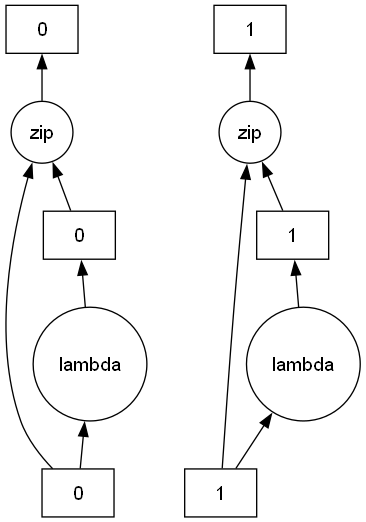

In [8]:
c.visualize()

In [9]:
from dask.distributed import Client

In [10]:
client = Client()


def inc(x):
    return x + 1


def add(x, y):
    return x + y

In [11]:
a = client.submit(inc, 1)  # work starts immediately
b = client.submit(inc, 2)  # work starts immediately
c = client.submit(add, a, b)  # work starts immediately

c = c.result()  # block until work finishes, then gather result